<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_581/NGC_581_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 5.6MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 2.6MB 48.6MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=7d90c033784e3da159c49fe22287e3c9aa72a309facc548fe0f510f011b7c4d0
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC581 center

coordinate = coord.SkyCoord.from_name('NGC581')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (23.3458, 60.65)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 509862821919372288,509862821919372288,47528498,2015.5,23.342139,1.604631,60.649335,1.924199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,0,74,3,-1.690774,50.439827,0.000000,0.000000,3,False,0.013024,NaN,NaN,0.064572,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.050758,-1.805004,49.391006,46.257850,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001922
1,1635721458409799680,Gaia DR2 509862821917654528,509862821917654528,1136255935,2015.5,23.348224,0.139566,60.647837,0.177842,-0.117917,0.265819,-0.443600,-0.968698,0.239517,-0.755574,0.333036,-0.344465,0.233086,-0.361592,0.023643,-0.111166,-0.073079,-0.014817,-0.328323,0.382878,-0.534408,431,9,430,1,-0.220854,417.933929,0.000000,0.000000,31,False,0.280584,1.500798,0.040730,-0.014264,...,475.126210,6.379536,74.476608,18.069897,1.413960,0,1.256254,0.423300,0.832954,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.053945,-1.805999,49.393524,46.255003,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002464
2,1635721458409799680,Gaia DR2 509862821917646848,509862821917646848,155749623,2015.5,23.344755,1.478474,60.652509,1.737626,5.535791,2.359475,2.346196,3.956021,2.288899,0.605896,3.020984,0.068784,0.569105,-0.225318,-0.318779,-0.304135,-0.396514,-0.257745,0.012941,0.018103,0.083448,102,0,100,2,2.308400,129.681671,3.333368,1.373995,31,False,0.013662,1.700624,0.358144,0.133700,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051509,-1.801664,49.395005,46.259868,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002562
3,1635721458409799680,Gaia DR2 509862821917646976,509862821917646976,324531031,2015.5,23.344351,0.267437,60.652526,0.315644,1.245240,0.500280,2.489087,-2.935483,0.498879,4.157978,0.617648,-0.325415,0.187524,-0.255984,0.024045,-0.270366,-0.010201,-0.091205,-0.220582,0.272263,-0.549402,435,0,433,2,10.904075,831.817810,2.098145,6.998055,31,False,0.069347,1.523048,0.080300,-0.036152,...,359.104309,5.585718,64.289734,18.373869,1.895344,0,1.528061,0.289089,1.238972,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051310,-1.801679,49.394775,46.259987,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002626
4,1635721458409799680,Gaia DR2 509862821919736832,509862821919736832,10975901,2015.5,23.341592,2.689071,60.651851,3.262242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,0,105,0,2.

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [82]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [83]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [84]:
all_stars_filtered.shape

(29833, 99)

##### Visualizing GAIA data

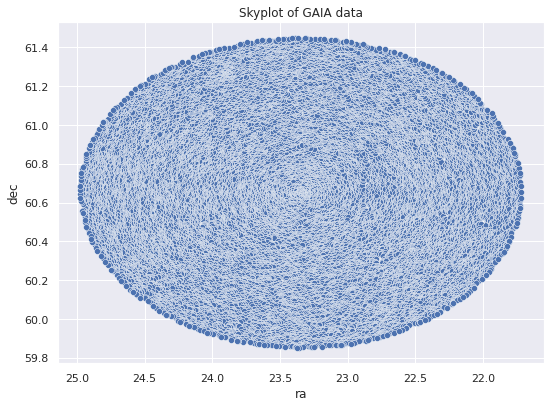

In [85]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [86]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [87]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [88]:
## saving only NGC 581 data from Cantat GAIA DR2 paper

cantat_581 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_581")
cantat_581 = cantat_581[0].to_pandas()
cantat_581

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,23.444496,60.711214,509864230674369664,0.4203,-1.305,-0.111,NaN,17.485600,1.7305,0.1,NGC_581,23.444507,60.711214
1,23.366839,60.571187,509861447535756416,0.3875,-1.400,-0.631,NaN,15.760600,0.8743,0.9,NGC_581,23.366851,60.571189
2,23.139522,60.607261,509850796015034752,0.3732,-0.647,-0.651,NaN,15.411700,1.0211,0.1,NGC_581,23.139527,60.607263
3,23.379967,60.647975,509862169084115200,0.3209,-1.256,-0.624,NaN,17.417801,1.1832,0.3,NGC_581,23.379978,60.647978
4,23.181250,60.669540,509874538595633152,0.3057,-1.849,-0.380,NaN,16.319901,0.8084,0.1,NGC_581,23.181266,60.669541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,23.330910,60.679827,509863028083270656,0.3097,-1.386,-0.559,NaN,11.704800,0.3024,0.6,NGC_581,23.330922,60.679829
302,23.256299,60.768428,509876737611440768,0.4223,-0.963,-0.726,NaN,17.515200,1.3165,0.3,NGC_581,23.256307,60.768431
303,23.491549,60.548354,509858286439769344,0.3422,-1.321,-0.518,NaN,14.846400,0.6234,1.0,NGC_581,23.491561,60.548357
304,23.204670,60.602775,509839079344255744,0.3770,-1.424,-0.456,NaN,14.848400,0.6502,1.0,NGC_581,23.204683,60.602777


In [89]:
# renaming the cantat table to match it with gaia_data
cantat_581 = cantat_581.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [90]:
# taking the subset of only source_id and PMemb
cantat_581 = cantat_581.loc[:,['source_id', 'PMemb']]


In [91]:
# join the two table on source_id
cantat_581 = all_stars_filtered.join(cantat_581.set_index('source_id'), on='source_id')

In [92]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_581 = cantat_581.dropna(subset=['PMemb'])
cantat_581

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006014,26.600638,9.164910,0.8
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007316,41.473889,11.277138,0.9
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008071,33.754465,4.240307,0.5
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350

In [93]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_581.to_csv('NGC_581_cantat.csv')
# all_stars.to_csv('NGC_581_Gaia_30m.csv')

In [94]:
cantat_581.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,2.900000e+02,2.900000e+02,2.900000e+02,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,2.880000e+02,288.000000,288.000000,288.000000,288.000000,290.000000,288.000000,288.000000,288.000000,2.000000,2.000000,290.000000,2.000000,2.00000,2.0,290.000000,290.000000,290.000000,290.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,290.000000,290.000000,290.000000,290.000000
mean,1.635721e+18,5.098627e+17,8.416266e+08,2015.5,23.338835,0.030821,60.658352,0.035665,0.370212,0.052312,9.211559,-1.385519,0.053763,-0.512812,0.069884,-0.273094,0.137877,-0.439420,0.078064,-0.131670,0.011754,-0.169387,-0.133181,0.210211,-0.501601,440.434483,37.458621,437.137931,3.296552,1.140274,482.812012,0.026174,0.360310,31.0,37.881733,1.582347,0.008702,-0.029970,50.424138,18.989655,...,1.705135e+05,379.286028,616.711670,14.957777,1.256457,0.027586,0.964137,0.388489,0.575648,-49.753553,0.612721,0.137931,5000.000000,3.75000,0.0,128.047705,-1.796305,49.395971,46.266373,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077927,33.825061,9.690265,0.548966
std,0.000000e+00,8.575887e+12,5.013692e+08,0.0,0.127096,0.016515,0.064280,0.018988,0.054995,0.027820,4.856950,0.238796,0.028661,0.202091,0.036665,0.097456,0.086305,0.065411,0.072730,0.078853,0.078360,0.078169,0.088729,0.070053,0.075897,34.187821,120.074660,34.604662,5.116801,4.912604,201.802109,0.080439,1.330248,0.0,74.743462,0.071796,0.004615,0.028910,3.851406,1.070150,...,1.642842e+06,3034.217687,397.542999,1.677215,0.117661,0.183952,0.361863,0.195735,0.189441,6.258113,0.414016,1.935359,707.106812,1.06066,0.0,0.063817,0.062788,0.084823,0.067624,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044722,17.966852,6.073610,0.324569
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.635927,258.000000,0.000000,248.000000,

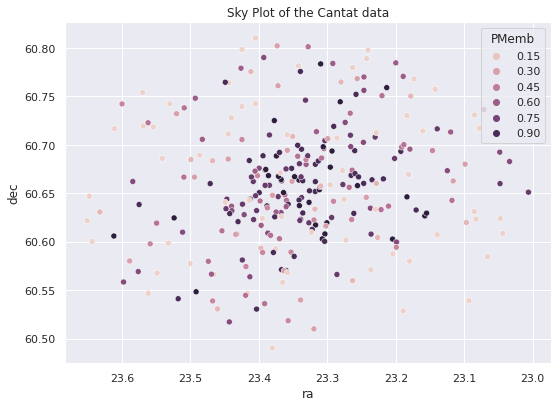

In [95]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_581['ra'], y = cantat_581['dec'], 
                          hue = cantat_581['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [96]:
# import member dataset
member = cantat_581.copy()

In [97]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_581_center'] = distance

In [98]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_581_center)
cantat_radius

0.16648548755262332

In [99]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006014,26.600638,9.164910,0.8,0.006009,1
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007316,41.473889,11.277138,0.9,0.007314,1
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008071,33.754465,4.240307,0.5,0.008080,1
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350,0.3146,0.7280,200111,3.628262,3.370500,3.941872,41.880226,35.

In [100]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_581_center'] = distance

In [101]:
non_member = all_stars_filtered[all_stars_filtered['dist_581_center'] >= 0.7].sample(len(member), random_state = 42)

In [102]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_581_center,member
173531,1635721458409799680,Gaia DR2 509951573125687296,509951573125687296,45965983,2015.5,24.470881,0.020632,61.219561,0.024149,0.975251,0.038267,25.485672,8.538708,0.037733,-2.968432,0.049278,-0.373062,0.029715,-0.376326,0.111024,-0.032785,0.058932,-0.120130,-0.062318,0.121504,-0.575324,400,0,398,2,-1.887376,341.817566,0.000000,0.000000,31,False,15.972437,1.482375,0.006238,-0.016743,...,1.276087,1,1.418928,0.642982,0.775947,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.493943,-1.149615,50.501579,46.453591,100002,4556.333496,4390.000000,5008.735352,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.334045,1.103939,1.437052,0.691031,0.628663,0.753399,https://gea.esac.esa.int/data-server/datalink/...,,0.789364,226.293112,60.238607,0.786010,0
144527,1635721458409799680,Gaia DR2 509788982844971648,509788982844971648,253116301,2015.5,24.488767,0.023780,60.207695,0.026767,0.271202,0.040990,6.616241,0.834282,0.040812,0.624249,0.056777,-0.385084,0.087097,-0.484543,0.135684,-0.039270,0.100351,-0.185545,-0.072859,0.080721,-0.580281,593,0,589,4,-1.408472,536.544189,0.000000,0.000000,31,False,7.998865,1.502419,0.006349,-0.058390,...,1.272371,0,1.360199,0.606428,0.753771,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.684102,-2.143505,49.752596,45.585568,100001,5013.000000,4777.250000,5107.820312,1.4262,1.0199,2.064,0.729,0.5494,1.2672,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.716772,20.441848,10.994745,0.719815,0
176418,1635721458409799680,Gaia DR2 510621515000800768,510621515000800768,1163921519,2015.5,21.817499,0.042839,60.928559,0.047165,0.277367,0.074891,3.703593,-1.543719,0.077465,0.373315,0.091981,-0.317827,0.160831,-0.379877,0.092916,-0.070686,0.060393,-0.265802,-0.251507,0.259582,-0.536968,398,0,396,2,-0.871629,366.489655,0.000000,0.000000,31,False,3.454620,1.561594,0.012481,-0.056353,...,1.255558,0,1.105156,0.456682,0.648474,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,127.272838,-1.640827,48.693090,46.891422,100001,5005.399902,4897.000000,5219.386719,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.796151,19.927884,4.058624,0.793128,0
172928,1635721458409799680,Gaia DR2 509786504636156288,509786504636156288,1345620232,2015.5,24.463001,0.096255,60.088059,0.106816,0.527027,0.173349,3.040270,-1.820300,0.166673,-0.512928,0.230822,-0.426946,0.146122,-0.470196,0.137841,-0.081268,0.076114,-0.113357,-0.149950,0.171487,-0.632568,645,0,642,3,3.267848,760.153503,0.297593,0.789653,31,False,0.477362,1.436459,0.025295,-0.041109,...,1.292586,0,1.604664,0.759115,0.845549,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.692947,-2.263502,49.648640,45.489780,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-ser

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


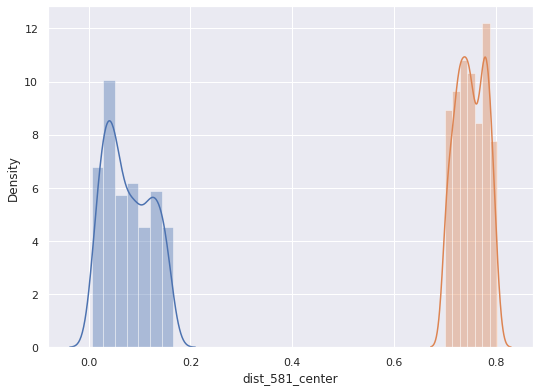

In [103]:
sns.distplot(member['dist_581_center'])
sns.distplot(non_member['dist_581_center'])
plt.show()

In [104]:
training_data = pd.concat([member, non_member])

In [105]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,5.800000e+02,5.800000e+02,5.800000e+02,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,576.000000,576.000000,576.000000,580.000000,576.000000,576.000000,576.000000,12.000000,12.000000,580.000000,12.000000,12.000000,12.0,580.000000,580.000000,580.000000,580.000000,399.000000,399.000000,399.000000,399.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,580.000000,580.000000,580.000000,290.000000,580.000000,580.000000
mean,1.635721e+18,5.099223e+17,8.608093e+08,2015.5,23.366659,0.038658,60.638328,0.044417,0.492528,0.064414,10.284226,-0.922579,0.068100,-0.726499,0.088111,-0.294364,0.099169,-0.461269,0.107326,-0.079192,0.050290,-0.210396,-0.106565,0.170102,-0.519470,457.277586,29.660345,454.182759,3.094828,1.754758,538.694824,0.060333,1.460083,31.0,27.404596,1.534923,0.010628,-0.032700,52.218966,18.636207,...,568.013123,15.296443,1.278373,0.034483,1.204600,0.524557,0.680043,-52.326609,0.698367,0.332759,4604.166504,3.291667,0.0,128.063832,-1.811668,49.398842,46.242821,100028.636591,5504.867676,5282.299316,5809.592285,1.180432,0.877131,1.483153,0.590254,0.434299,0.745538,200111.0,4.617867,4.191651,4.967329,143.005753,118.712189,167.299240,0.414508,45.223233,17.953292,0.548966,0.414547,0.500000
std,0.000000e+00,2.877562e+14,4.927808e+08,0.0,0.781224,0.023860,0.374318,0.026970,0.384376,0.038338,13.726858,3.643675,0.042206,2.329786,0.053435,0.118058,0.089947,0.065334,0.094632,0.095078,0.099058,0.107985,0.087104,0.090904,0.093321,70.944532,111.708479,70.902480,4.617640,6.671327,385.864624,0.140938,7.819210,0.0,63.742764,0.089414,0.006446,0.031937,7.996026,1.227379,...,402.900818,1.637302,0.108560,0.191847,0.462602,0.270317,0.215353,32.290178,0.584890,2.475712,516.306091,0.582250,0.0,0.380093,0.377482,0.561684,0.368586,228.251868,1140.953247,1076.266235,1206.204712,0.431745,0.404506,0.497971,0.216721,0.205311,0.254445,0.0,20.062424,18.322950,21.488064,1306.149048,1080.643921,1532.354980,0.338958,88.779771,41.399903,0.324569,0.338995,0.500432
min,1.635721e+18,5.093937e+17,2.885440e+05,2015.5,21.732964,0.009833,59.856210,0.011431,0.069924,0.016208,3.005832,-35.208296,0.017211,-22.176749,0.022449,-0.563927,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.622344,-0.444580,-0.407453,-0.712065,258.000000,0.000000,248.000000,0.000000,-11.

In [106]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [107]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,580.000000,580.000000,580.000000
mean,0.492528,-0.922579,-0.726499
std,0.384376,3.643675,2.329786
min,0.069924,-35.208294,-22.176748
25%,0.330511,-1.543182,-0.804086
50%,0.389768,-1.369538,-0.513539
75%,0.484054,-0.943940,-0.289872
max,4.877543,29.000822,15.261477


In [108]:
targets.value_counts()

1    290
0    290
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


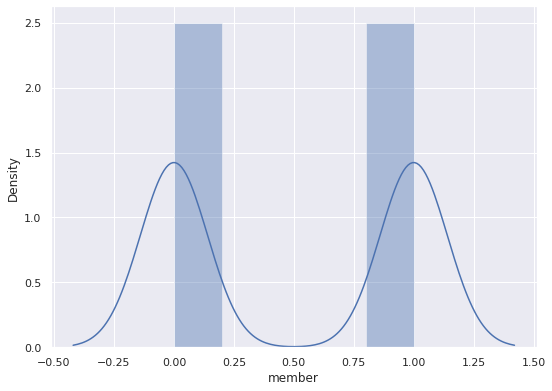

In [109]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

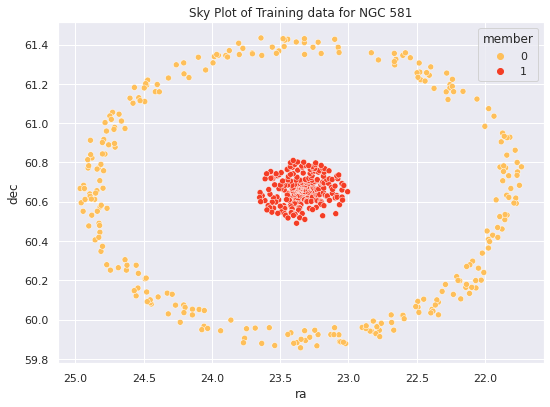

In [110]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 581')
plt.show()

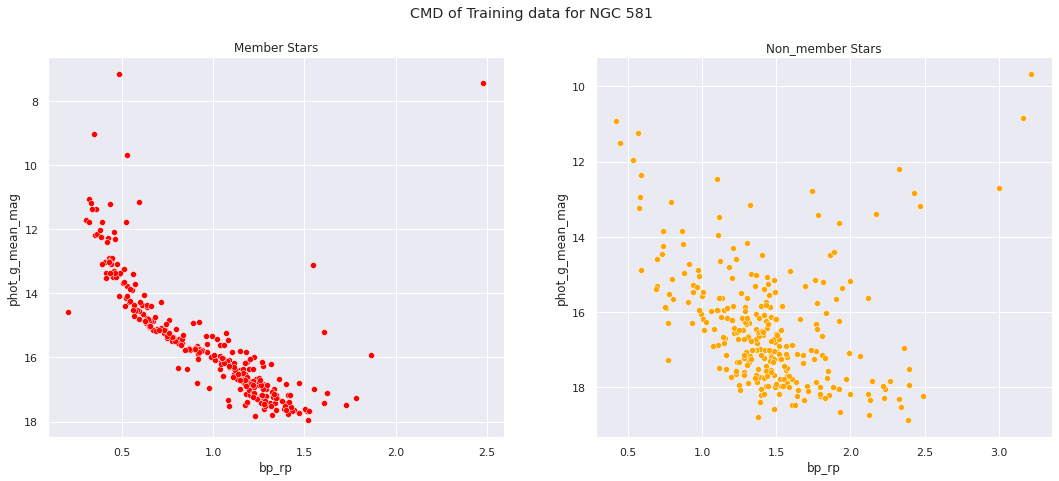

In [111]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 581 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


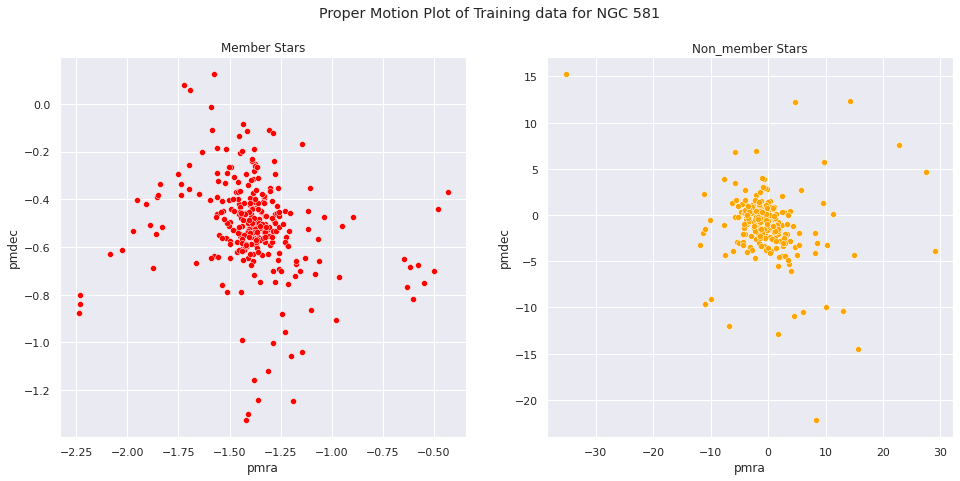

In [112]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 581 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


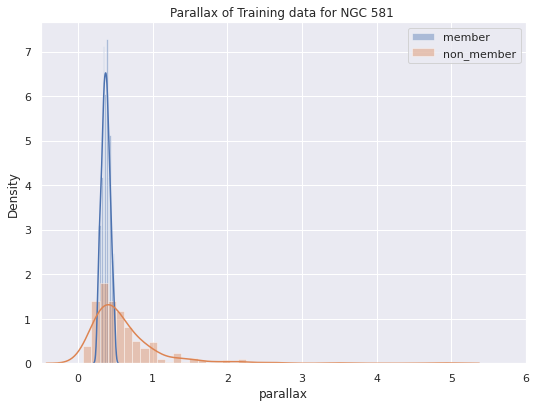

In [113]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 581 ')
plt.legend()
plt.show()

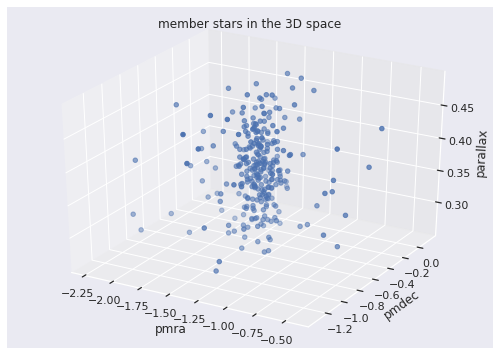

In [114]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


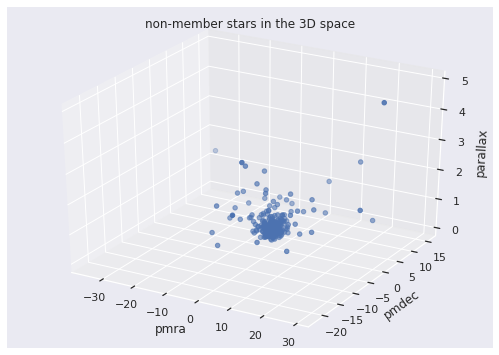

In [115]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [116]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.363247
parallax    0.330525
pmdec       0.306227
dtype: float64

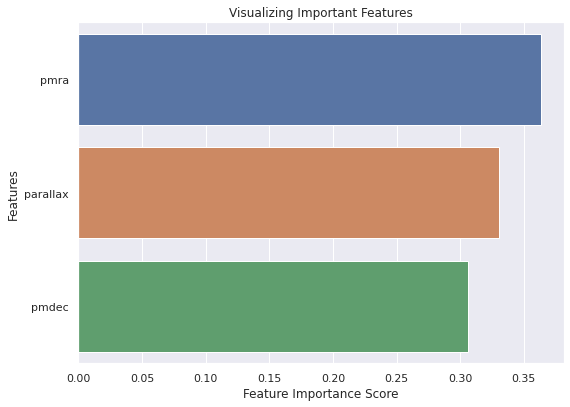

In [118]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [120]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [121]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [122]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [123]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [124]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [125]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0009765625,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.909
Accuracy on test data: 0.943


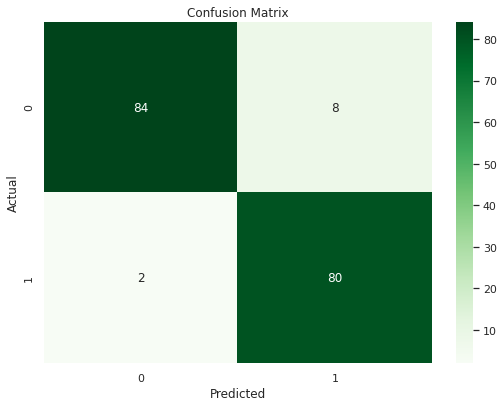

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        92
           1       0.91      0.98      0.94        82

    accuracy                           0.94       174
   macro avg       0.94      0.94      0.94       174
weighted avg       0.94      0.94      0.94       174



In [126]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.932
Precision on testing data: 0.909
Accuracy on test data: 0.943


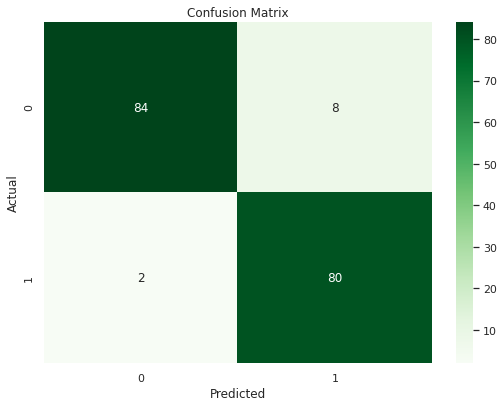

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        92
           1       0.91      0.98      0.94        82

    accuracy                           0.94       174
   macro avg       0.94      0.94      0.94       174
weighted avg       0.94      0.94      0.94       174



In [127]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [128]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center
count,2.983300e+04,2.983300e+04,2.983300e+04,29833.0,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.0,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,...,2.963400e+04,29634.000000,29634.000000,29634.000000,29634.000000,29833.000000,29634.000000,29637.000000,29634.000000,858.000000,858.000000,29833.000000,858.000000,858.000000,858.000000,29833.000000,29833.000000,29833.000000,29833.000000,18432.000000,18432.000000,18432.000000,18432.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,10796.0,10796.000000,10796.000000,10796.000000,10796.000000,10796.000000,10796.000000,29833.000000,29833.000000,29833.000000,29833.000000
mean,1.635721e+18,5.099889e+17,8.466348e+08,2015.5,23.365615,0.045683,60.647808,0.052037,0.617235,0.075035,11.770172,-0.136317,0.081338,-0.994709,0.104059,-0.305475,0.056290,-0.472558,0.127942,-0.037230,0.074498,-0.231431,-0.079630,0.140768,-0.532101,464.570107,15.172024,461.937083,2.633024,1.553378,576.269104,0.083478,2.689028,31.0,18.313841,1.495455,0.012394,-0.037751,53.003151,18.368116,...,2.822549e+04,46.100056,551.149414,15.631947,1.302818,0.055576,1.400673,0.626043,0.774588,-42.397821,1.508633,0.408675,5105.594238,3.367716,-0.046911,128.061897,-1.802187,49.405750,46.251146,100037.755263,4918.614258,4737.278809,5190.862793,1.147979,0.875897,1.484440,0.570296,0.431354,0.741940,200111.0,3.358614,3.015700,3.621945,19.064951,15.777186,22.352654,0.525807,54.199759,25.923859,0.525817
std,0.000000e+00,3.526879e+14,4.875735e+08,0.0,0.811984,0.029365,0.393630,0.033240,0.662039,0.046872,18.162392,6.459992,0.051986,3.882144,0.065767,0.127055,0.094878,0.074001,0.105571,0.091877,0.107060,0.116578,0.097434,0.094474,0.102465,71.610258,81.600358,71.346224,3.698660,8.438477,1119.757324,0.189458,24.877196,0.0,49.634281,0.075292,0.007930,0.032157,8.124285,1.292102,...,4.319066e+05,672.344074,440.688202,1.456006,0.115418,0.244397,0.395635,0.239321,0.177115,36.404302,1.913803,2.537315,664.737366,0.574380,0.258292,0.397148,0.394677,0.577474,0.392262,268.483343,734.907898,695.526733,789.364319,0.515933,0.484719,0.580872,0.261245,0.242364,0.296641,0.0,6.897602,6.271592,7.410986,261.951569,220.272964,303.923859,0.192223,143.087725,64.911038,0.192240
min,1.635721e+18,5.093905e+17,5.827000e+03,2015.5,21.715170,0.008443,59.850394,0.009909,0.068970,0.014476,3.00

In [129]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_581_center'] <= cantat_radius*2]

In [130]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [131]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [132]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [133]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    4632
1     512
Name: member, dtype: int64

In [134]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

512

In [135]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

512

In [136]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb
count,5.120000e+02,5.120000e+02,5.120000e+02,512.0,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,512.0,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,511.000000,511.000000,511.000000,512.000000,511.000000,511.000000,511.000000,8.000000,8.000000,512.000000,8.000000,8.000000,8.0,512.000000,512.000000,512.000000,512.000000,355.000000,355.000000,355.000000,355.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,512.000000,512.000000,512.000000,512.000000,512.0,512.000000
mean,1.635721e+18,5.098572e+17,8.559821e+08,2015.5,23.365320,0.036452,60.654749,0.041641,0.361276,0.061986,7.729509,-1.409953,0.064401,-0.552985,0.082944,-0.283850,0.112991,-0.431784,0.083904,-0.112133,0.031223,-0.197305,-0.135137,0.203476,-0.512720,459.746094,14.015625,457.228516,2.517578,0.574794,486.724945,0.032621,7.487747e-01,31.0,20.857864,1.546964,0.010145,-0.035571,52.404297,18.595703,...,565.653748,15.509060,1.264839,0.019531,1.135837,0.480378,0.655459,-44.132883,1.152247,0.218750,5375.000000,3.562500,0.0,128.060971,-1.797374,49.409425,46.256572,100040.464789,5454.032715,5235.079102,5744.147949,1.204661,0.895939,1.544898,0.603070,0.442895,0.779536,200111.0,3.361673,2.999817,3.675314,20.227711,16.803185,23.652239,0.236403,29.363783,8.812376,0.236394,1.0,0.773491
std,0.000000e+00,5.424655e+13,4.768845e+08,0.0,0.348041,0.019833,0.177564,0.022518,0.059346,0.032722,4.537169,0.417079,0.034277,0.278806,0.043954,0.089472,0.080983,0.072525,0.077267,0.077812,0.078199,0.098744,0.100660,0.088835,0.078861,34.560053,78.974195,33.942632,3.360249,4.680784,276.301605,0.085642,6.516465e+00,0.0,50.293243,0.066991,0.005447,0.031820,3.885169,1.144467,...,400.400055,1.325256,0.056057,0.138518,0.329468,0.173891,0.163551,26.584495,0.509325,1.746957,353.553406,0.623212,0.0,0.169276,0.178868,0.255659,0.171380,278.449644,944.960876,880.471985,1012.030518,0.488218,0.487555,0.527886,0.248397,0.242434,0.275352,0.0,2.921350,2.585934,3.147160,84.276459,70.762756,97.807304,0.068858,18.801400,6.801887,0.068848,0.0,0.143885
min,1.635721e+18,5.097856e+17,1.322465e+07,2015.5,22.691278,0.009860,60.317317,0.011448,0.261965,0.016178,3.019518,-2.277093,0.017003,-1.385289,0.022416,-0.710997,-0.160714,-0.696001,-0.246654,-0.341127,-0.326226,-0.498084,-0.434729,-0.058535,-0.766491,293.000000,0.000000,293.000000,0.000000,-7.862045,251.828323,0.000000,0.000

In [137]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,2.900000e+02,2.900000e+02,2.900000e+02,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,288.000000,288.000000,288.000000,290.000000,288.000000,288.000000,288.000000,2.000000,2.000000,290.000000,2.000000,2.00000,2.0,290.000000,290.000000,290.000000,290.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,1.635721e+18,5.098627e+17,8.416266e+08,2015.5,23.338835,0.030821,60.658352,0.035665,0.370212,0.052312,9.211559,-1.385519,0.053763,-0.512812,0.069884,-0.273094,0.137877,-0.439420,0.078064,-0.131670,0.011754,-0.169387,-0.133181,0.210211,-0.501601,440.434483,37.458621,437.137931,3.296552,1.140274,482.812012,0.026174,0.360310,31.0,37.881733,1.582347,0.008702,-0.029970,50.424138,18.989655,...,616.711670,14.957777,1.256457,0.027586,0.964137,0.388489,0.575648,-49.753553,0.612721,0.137931,5000.000000,3.75000,0.0,128.047705,-1.796305,49.395971,46.266373,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077927,33.825061,9.690265,0.548966,0.077924,1.0
std,0.000000e+00,8.575887e+12,5.013692e+08,0.0,0.127096,0.016515,0.064280,0.018988,0.054995,0.027820,4.856950,0.238796,0.028661,0.202091,0.036665,0.097456,0.086305,0.065411,0.072730,0.078853,0.078360,0.078169,0.088729,0.070053,0.075897,34.187821,120.074660,34.604662,5.116801,4.912604,201.802109,0.080439,1.330248,0.0,74.743462,0.071796,0.004615,0.028910,3.851406,1.070150,...,397.542999,1.677215,0.117661,0.183952,0.361863,0.195735,0.189441,6.258113,0.414016,1.935359,707.106812,1.06066,0.0,0.063817,0.062788,0.084823,0.067624,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044722,17.966852,6.073610,0.324569,0.044718,0.0
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.635927,258.000000,0.000000,248.000000,0.000000,-5.932523,285.132050,0.000000,0.000000,3

#### Visualization

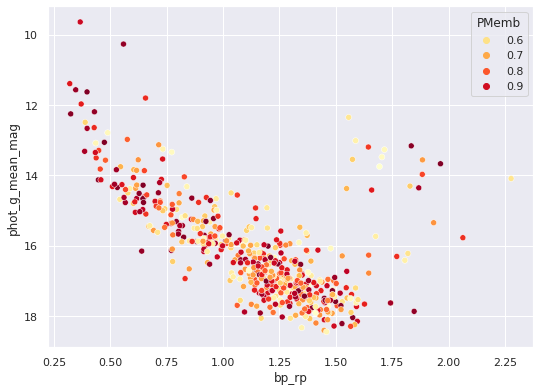

In [138]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

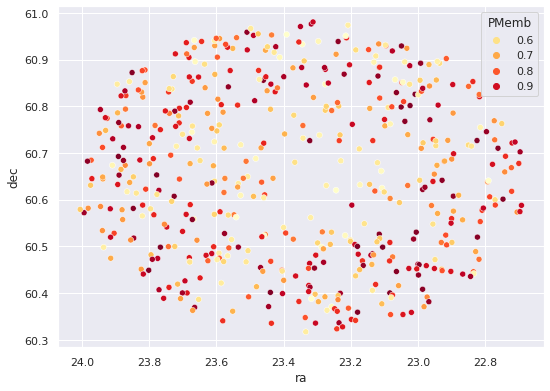

In [139]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

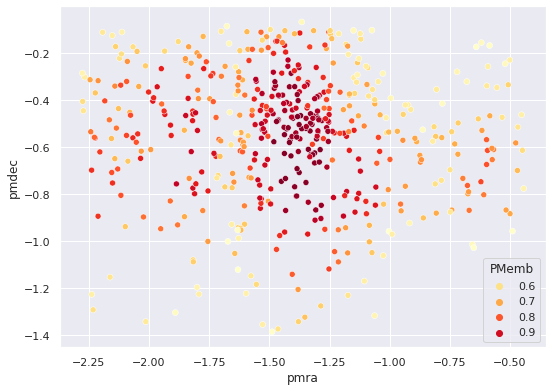

In [140]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


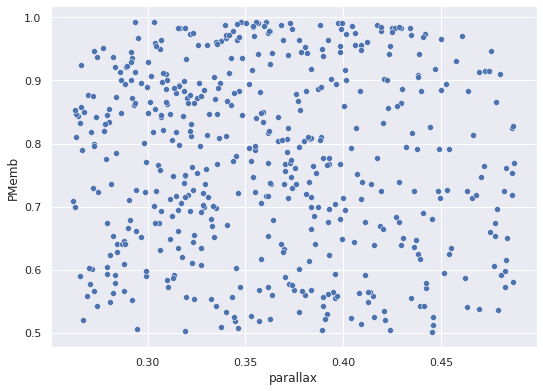

In [141]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [142]:
# saving the files as csv
# all_stars.to_csv('gaia_581_membership_prob.csv')

potentialMember.to_csv('NGC_581_membership_prob.csv')


### Comparing the old and new predicted members

In [143]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [144]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb
count,8.020000e+02,8.020000e+02,8.020000e+02,802.0,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000,802.000000,8.020000e+02,802.0,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,...,799.000000,799.000000,799.000000,802.000000,799.000000,799.000000,799.000000,10.000000,10.000000,802.000000,10.000000,10.000000,10.0,802.000000,802.000000,802.000000,802.000000,585.000000,585.000000,585.000000,585.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,802.000000,802.000000,802.000000,802.000000,802.0,802.000000
mean,1.635721e+18,5.098592e+17,8.507912e+08,2015.5,23.355743,0.034416,60.656052,0.039480,0.364507,0.058488,8.265411,-1.401118,0.060554,-0.538459,0.078222,-0.279961,0.121989,-0.434545,0.081792,-0.119198,0.024183,-0.187210,-0.134430,0.205911,-0.508699,452.763092,22.492519,449.96384,2.799252,0.779269,485.309937,0.030290,6.083075e-01,31.0,27.013630,1.559758,0.009623,-0.033546,51.688279,18.738155,...,584.057800,15.310344,1.261819,0.022444,1.073948,0.447256,0.626691,-45.257017,1.044342,0.189526,5300.000000,3.600000,0.0,128.056174,-1.796988,49.404560,46.260116,100038.651282,5653.308594,5421.747559,5952.588867,1.184078,0.867351,1.501823,0.594168,0.430119,0.757372,200111.0,4.184198,3.782900,4.541839,108.825836,90.224579,127.427094,0.179099,30.976963,9.129817,0.179092,1.0,0.692304
std,0.000000e+00,4.371286e+13,4.856176e+08,0.0,0.288561,0.018886,0.146995,0.021490,0.057935,0.031368,4.706563,0.362887,0.032743,0.254358,0.041916,0.092523,0.083752,0.070091,0.075664,0.078704,0.078767,0.092764,0.096465,0.082557,0.077938,35.635255,96.477242,35.50112,4.097543,4.770607,251.792908,0.083805,5.269113e+00,0.0,60.796890,0.070797,0.005205,0.030899,3.985941,1.133428,...,399.876343,1.484692,0.083687,0.156411,0.351101,0.187224,0.177405,23.656943,0.522073,1.816553,421.637024,0.658281,0.0,0.140678,0.147760,0.210559,0.142862,272.013071,1060.073730,990.550049,1133.942749,0.445792,0.442800,0.482905,0.226441,0.221508,0.249711,0.0,16.669802,15.214375,17.884651,1104.793335,914.072998,1296.100098,0.097731,18.616672,6.557656,0.097723,0.0,0.250734
min,1.635721e+18,5.097856e+17,2.885440e+05,2015.5,22.691278,0.009833,60.317317,0.011431,0.261965,0.016178,3.005832,-2.277093,0.017003,-1.385289,0.022416,-0.710997,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.498084,-0.444580,-0.058535,-0.766491,258.000000,0.000000,248.00000,0.000000,-7.862045,251.828323,0.

In [145]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,2.900000e+02,2.900000e+02,2.900000e+02,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,288.000000,288.000000,288.000000,290.000000,288.000000,288.000000,288.000000,2.000000,2.000000,290.000000,2.000000,2.00000,2.0,290.000000,290.000000,290.000000,290.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,1.635721e+18,5.098627e+17,8.416266e+08,2015.5,23.338835,0.030821,60.658352,0.035665,0.370212,0.052312,9.211559,-1.385519,0.053763,-0.512812,0.069884,-0.273094,0.137877,-0.439420,0.078064,-0.131670,0.011754,-0.169387,-0.133181,0.210211,-0.501601,440.434483,37.458621,437.137931,3.296552,1.140274,482.812012,0.026174,0.360310,31.0,37.881733,1.582347,0.008702,-0.029970,50.424138,18.989655,...,616.711670,14.957777,1.256457,0.027586,0.964137,0.388489,0.575648,-49.753553,0.612721,0.137931,5000.000000,3.75000,0.0,128.047705,-1.796305,49.395971,46.266373,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077927,33.825061,9.690265,0.548966,0.077924,1.0
std,0.000000e+00,8.575887e+12,5.013692e+08,0.0,0.127096,0.016515,0.064280,0.018988,0.054995,0.027820,4.856950,0.238796,0.028661,0.202091,0.036665,0.097456,0.086305,0.065411,0.072730,0.078853,0.078360,0.078169,0.088729,0.070053,0.075897,34.187821,120.074660,34.604662,5.116801,4.912604,201.802109,0.080439,1.330248,0.0,74.743462,0.071796,0.004615,0.028910,3.851406,1.070150,...,397.542999,1.677215,0.117661,0.183952,0.361863,0.195735,0.189441,6.258113,0.414016,1.935359,707.106812,1.06066,0.0,0.063817,0.062788,0.084823,0.067624,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044722,17.966852,6.073610,0.324569,0.044718,0.0
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.635927,258.000000,0.000000,248.000000,0.000000,-5.932523,285.132050,0.000000,0.000000,3

In [146]:
concatenated.dataset.value_counts()

New_member    512
Old_member    290
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

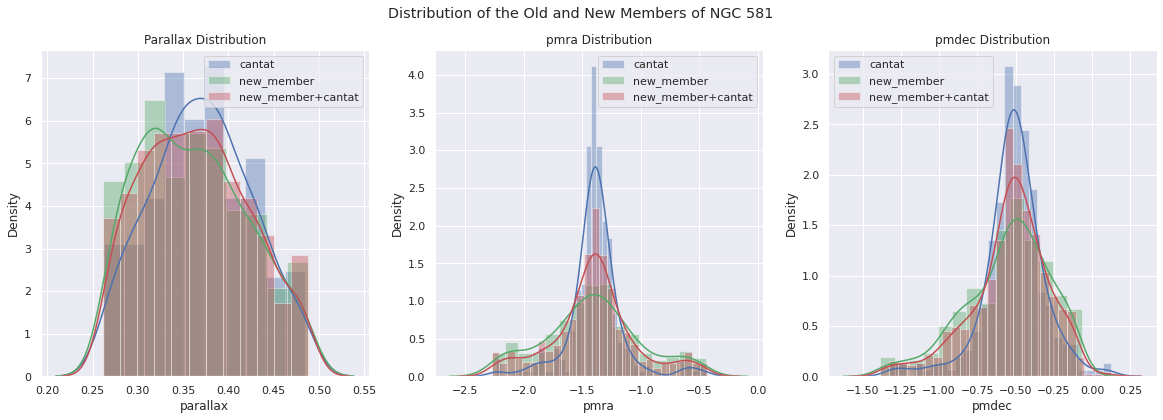

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 581')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


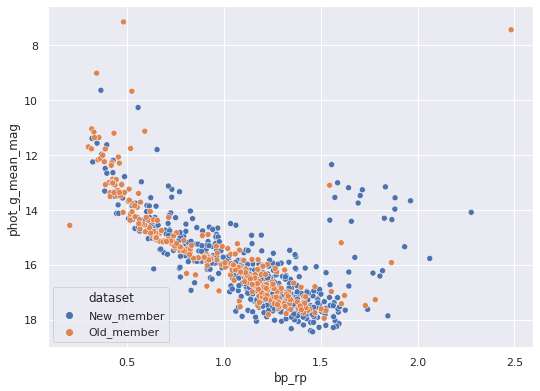

In [148]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

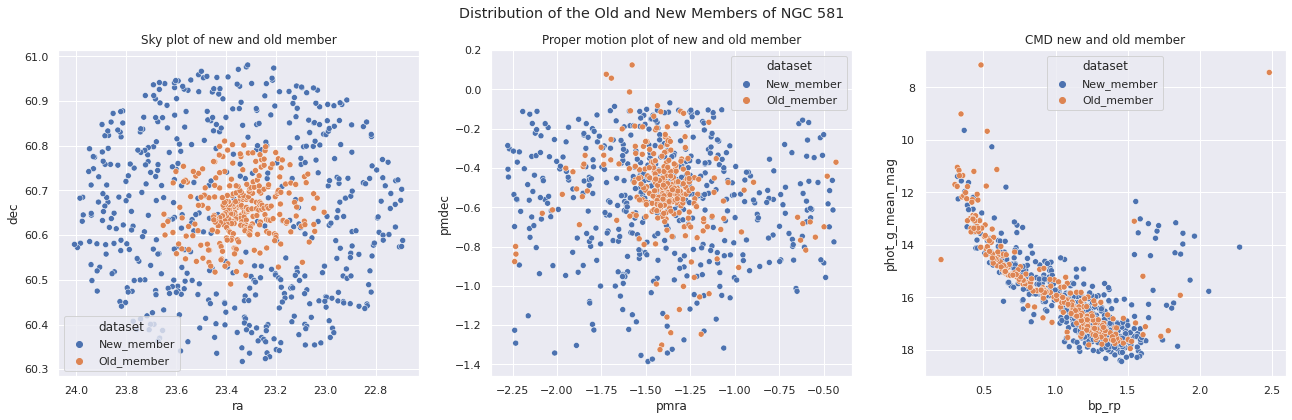

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 581')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD new and old member')

plt.show()

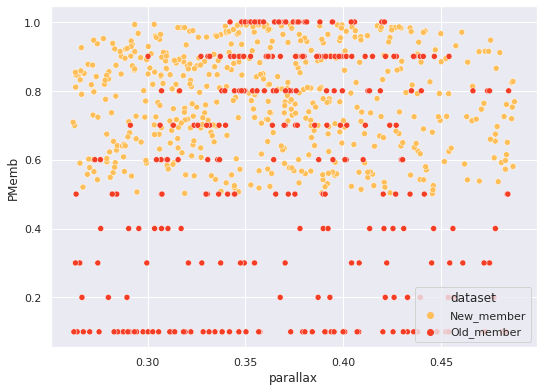

In [150]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [151]:
# pd_prof.ProfileReport(potentialMember)

In [152]:
#files.download('NGC_581_cantat.csv')

#files.download('NGC_581_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


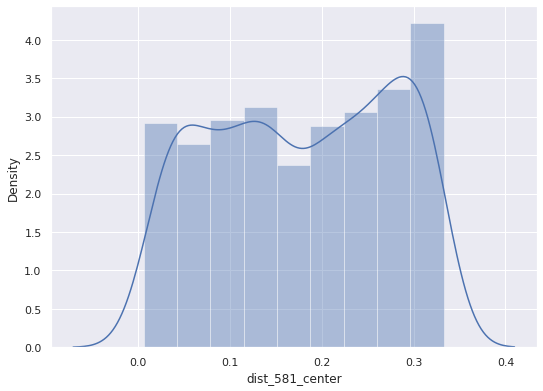

In [153]:
sns.distplot(concatenated['dist_581_center'])

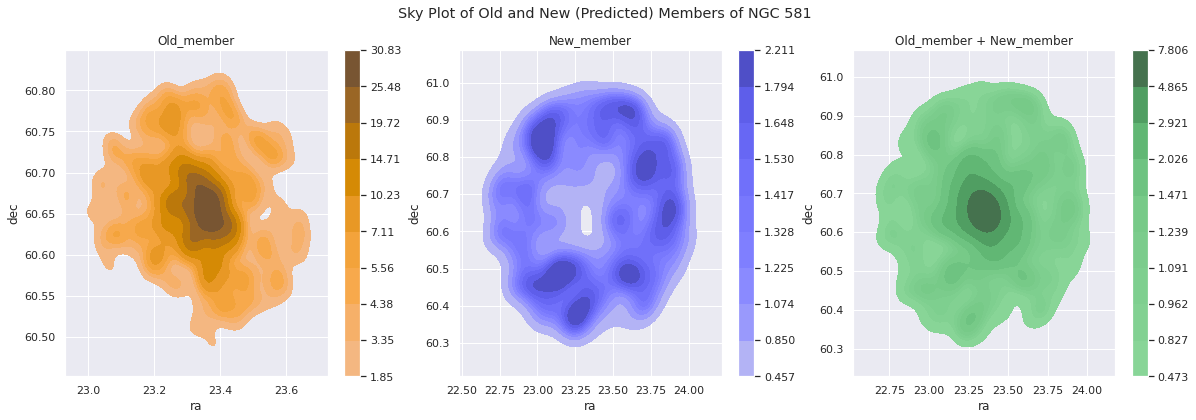

In [154]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 581')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

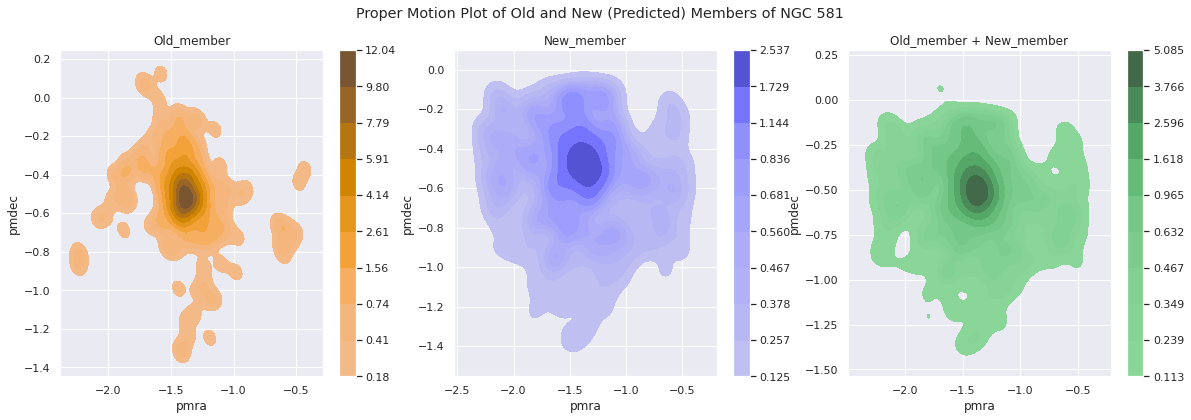

In [155]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 581')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [156]:
#files.download('NGC_581_cantat.csv')

potentialMember.to_csv('NGC_581_additional_member_prob.csv')
concatenated.to_csv('NGC_581_all_member_prob.csv')

files.download('NGC_581_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_581_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>